## 4. Bi varient analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import pandas as pd
import numpy as np
import os
import cv2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv("ds3.csv",encoding='latin')
data.head()

,rank,country_name,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urbon_pop,world_share
0,1,China,1420062022,0.0035,5016094,151,9388211,-324919.0,1.6,39.0,0.60,0.1841
1,2,India,1368737513,0.0108,14685659,460,2973190,-490000.0,2.3,28.0,0.34,0.1774
2,3,United States,329093110,0.0071,2326362,36,9147420,900000.0,1.9,38.0,0.84,0.0427
3,4,Indonesia,269536482,0.0103,2741502,149,1811570,-165000.0,2.3,29.0,0.56,0.0349
4,5,Brazil,212392717,0.0072,1524763,25,8358140,6000.0,1.7,33.0,0.86,0.0275


In [3]:
#  Yearly chage vs net_change top 5
#   Yearly chage vs net_change least 5

In [4]:
yearly_high = data['yearly_change'].sort_values(ascending=False).head(5)
yearly_high
net_high = data['net_change'].sort_values(ascending=False).head(5)
net_high

151    0.0452
56     0.0388
121    0.0356
154    0.0352
45     0.0329
Name: yearly_change, dtype: float64

1    14685659
6     5087180
0     5016094
5     3782624
3     2741502
Name: net_change, dtype: int64

In [5]:
yearly_net =pd.DataFrame()

In [6]:
yearly_high.index =[1,2,3,4,5]
net_high.index = [1,2,3,4,5]

In [7]:
net_high

1    14685659
2     5087180
3     5016094
4     3782624
5     2741502
Name: net_change, dtype: int64

In [8]:
yearly_net['yearly_change'] = yearly_high
yearly_net['net_high'] = net_high

In [9]:
yearly_net

,yearly_change,net_high
1,0.0452,14685659
2,0.0388,5087180
3,0.0356,5016094
4,0.0352,3782624
5,0.0329,2741502


In [10]:
data.head()

,rank,country_name,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urbon_pop,world_share
0,1,China,1420062022,0.0035,5016094,151,9388211,-324919.0,1.6,39.0,0.60,0.1841
1,2,India,1368737513,0.0108,14685659,460,2973190,-490000.0,2.3,28.0,0.34,0.1774
2,3,United States,329093110,0.0071,2326362,36,9147420,900000.0,1.9,38.0,0.84,0.0427
3,4,Indonesia,269536482,0.0103,2741502,149,1811570,-165000.0,2.3,29.0,0.56,0.0349
4,5,Brazil,212392717,0.0072,1524763,25,8358140,6000.0,1.7,33.0,0.86,0.0275


(Text(0.5,0,'Population'), Text(0,0.5,'%Yearly Change'))

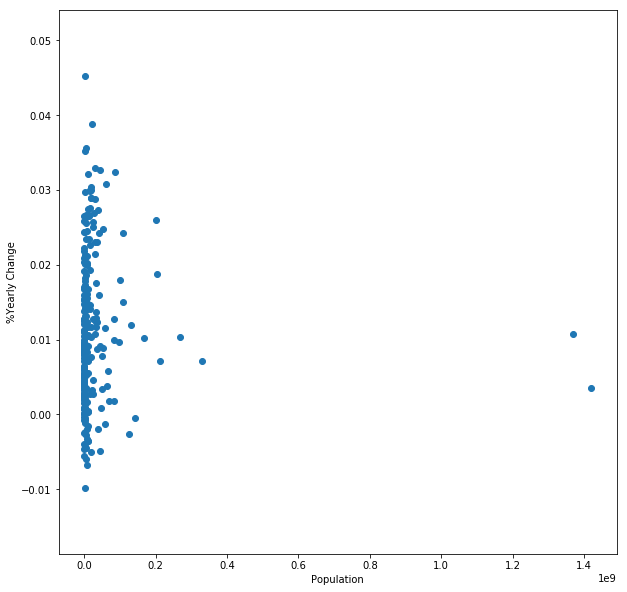

In [11]:
fig=plt.figure(figsize=(10,10))
plt.scatter(data['population'],data['yearly_change'])
plt.xlabel('Population'),plt.ylabel('%Yearly Change')
fig.savefig('shaid1.png')

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


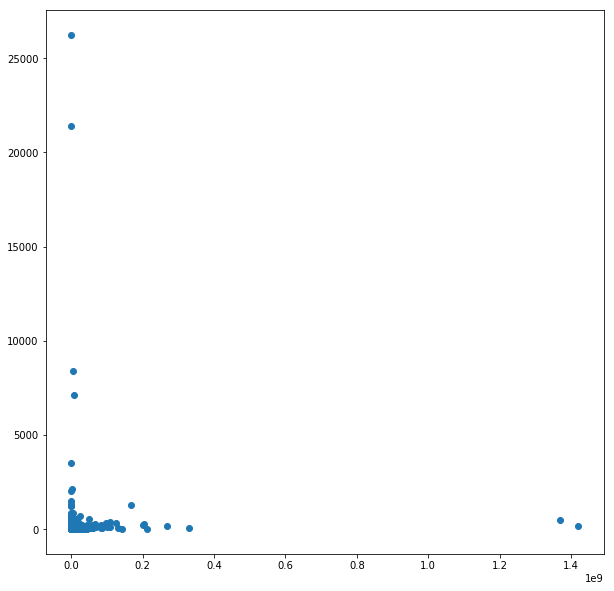

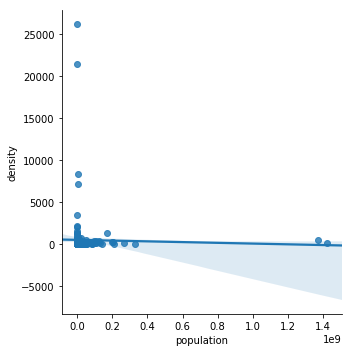

In [30]:
# population vs density
fig=plt.figure(figsize=(10,10))
plt.scatter(data['population'],data['density'])
sb.lmplot(x='population',y='density',data=data)
fig.savefig('shaid2.png')

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


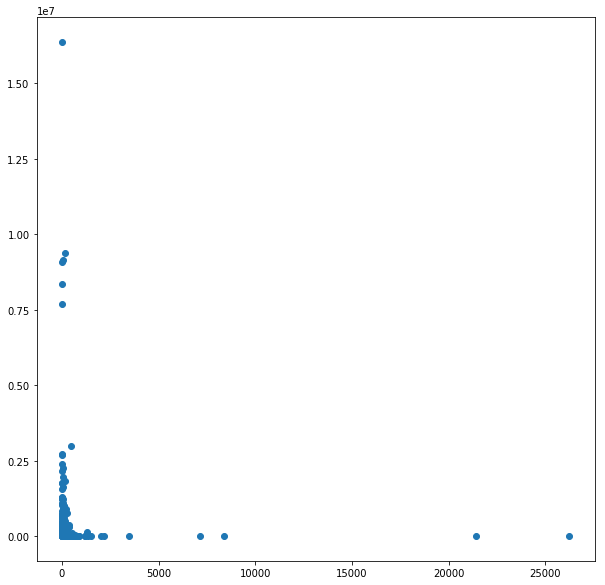

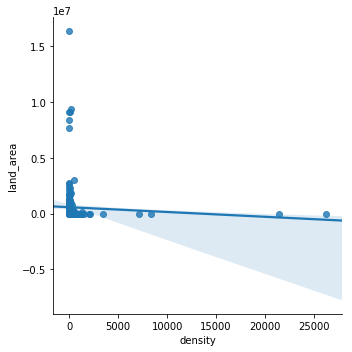

In [31]:
fig=plt.figure(figsize=(10,10))
plt.scatter(data['density'],data['land_area'])
sb.lmplot(x='density',y='land_area',data=data)
fig.savefig('shaid3.png')

# Age Groups

In [14]:
data.head()

,rank,country_name,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urbon_pop,world_share
0,1,China,1420062022,0.0035,5016094,151,9388211,-324919.0,1.6,39.0,0.60,0.1841
1,2,India,1368737513,0.0108,14685659,460,2973190,-490000.0,2.3,28.0,0.34,0.1774
2,3,United States,329093110,0.0071,2326362,36,9147420,900000.0,1.9,38.0,0.84,0.0427
3,4,Indonesia,269536482,0.0103,2741502,149,1811570,-165000.0,2.3,29.0,0.56,0.0349
4,5,Brazil,212392717,0.0072,1524763,25,8358140,6000.0,1.7,33.0,0.86,0.0275


In [15]:
def agegroup(age):

    if age <= 30:
        return 'young'
    elif age > 30 and age <50:
        return 'middle'
    else:
        return 'old'

In [16]:
data_n = data.copy()

In [17]:
data_n['age_group'] = data_n['med_age'].apply(agegroup)

In [18]:
data_n['age_group'].value_counts()

young     102
middle     99
old        32
Name: age_group, dtype: int64

In [19]:
data_n.set_index('country_name',inplace=True)

In [20]:
data_young = data_n[data_n['age_group'] == 'young']
data_young.head()

,rank,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urbon_pop,world_share,age_group
country_name,,,,,,,,,,,,
India,2,1368737513,0.0108,14685659,460,2973190,-490000.0,2.3,28.0,0.34,0.1774,young
Indonesia,4,269536482,0.0103,2741502,149,1811570,-165000.0,2.3,29.0,0.56,0.0349,young
Pakistan,6,204596442,0.0188,3782624,265,770880,-214356.0,3.4,23.0,0.40,0.0265,young
Nigeria,7,200962417,0.0260,5087180,221,910770,-60000.0,5.4,18.0,0.52,0.0260,young
Bangladesh,8,168065920,0.0102,1697771,1291,130170,-470000.0,2.1,27.0,0.37,0.0218,young


In [21]:
cd = data_young['population'].sum()
cd

4079342014

In [22]:
data_young['young_share'] = data_young['population']/cd

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
data_young.head()

,rank,population,yearly_change,net_change,density,land_area,migrants,fert_rate,med_age,urbon_pop,world_share,age_group,young_share
country_name,,,,,,,,,,,,,
India,2,1368737513,0.0108,14685659,460,2973190,-490000.0,2.3,28.0,0.34,0.1774,young,0.335529
Indonesia,4,269536482,0.0103,2741502,149,1811570,-165000.0,2.3,29.0,0.56,0.0349,young,0.066074
Pakistan,6,204596442,0.0188,3782624,265,770880,-214356.0,3.4,23.0,0.40,0.0265,young,0.050154
Nigeria,7,200962417,0.0260,5087180,221,910770,-60000.0,5.4,18.0,0.52,0.0260,young,0.049263
Bangladesh,8,168065920,0.0102,1697771,1291,130170,-470000.0,2.1,27.0,0.37,0.0218,young,0.041199


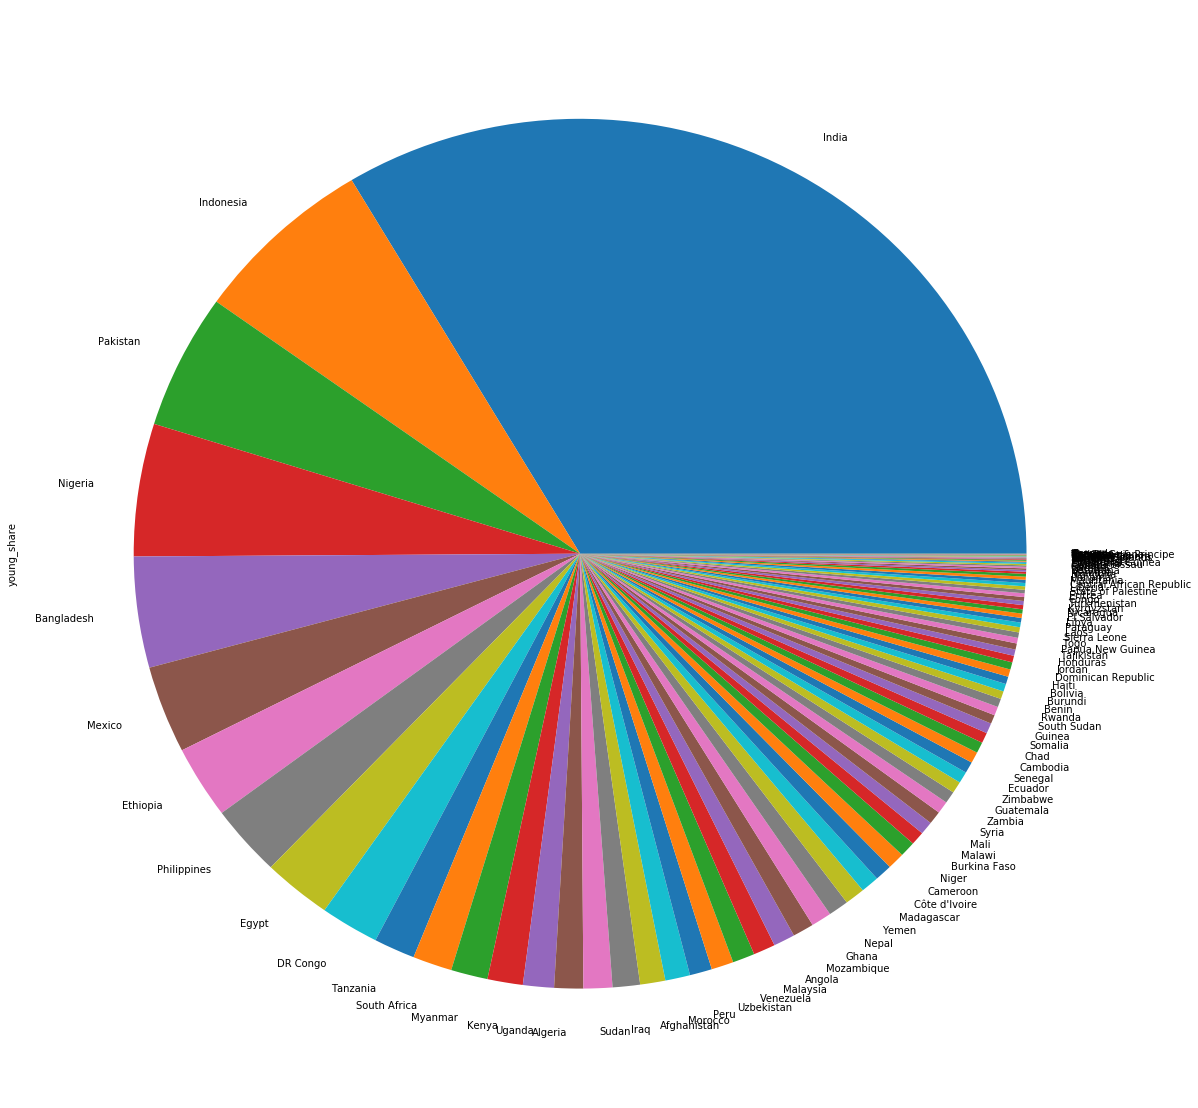

In [24]:
fig = plt.figure(figsize=(20,20))
data_young['young_share'].plot(kind='pie')

In [25]:
fig.savefig('shaid.png')

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


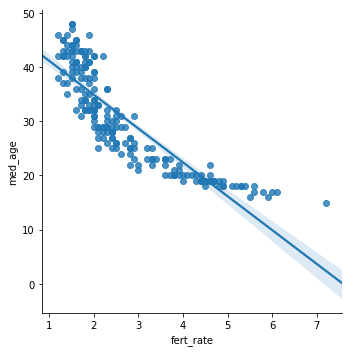

In [26]:
sb.lmplot(x='fert_rate',y='med_age',data=data)
fig.savefig('shaid4.png')

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


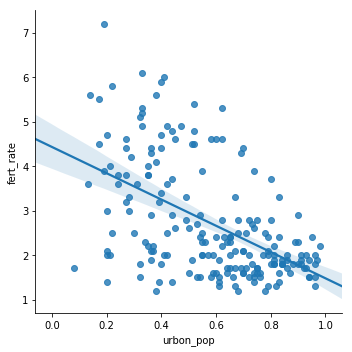

In [27]:
sb.lmplot(x='urbon_pop',y='fert_rate',data=data)
fig.savefig('shaid4.png')

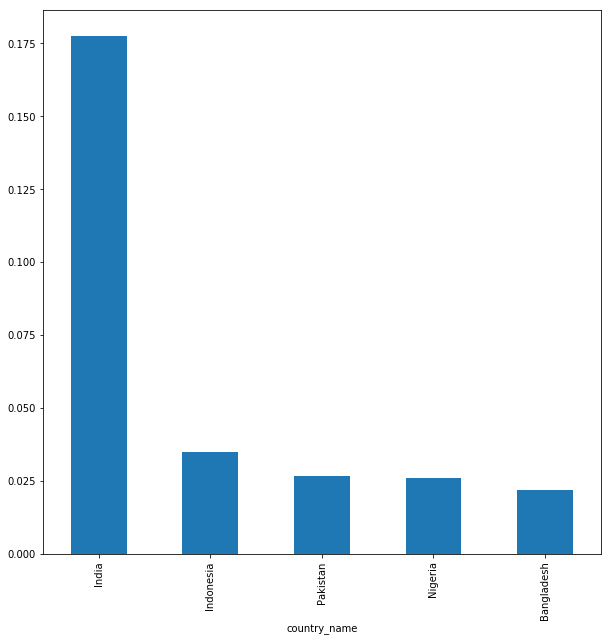

In [28]:
plt.figure(figsize=(10,10))
data_n[data_n['age_group'] == 'young'].head()['world_share'].plot(kind='bar')